<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/03_MNIST_Fashion_Classification/MNIST_Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Project Description : </b></h1>
  This project is usd to solve Multiclass-Classifcation Problem.

<h1><b>Step 1) Load Libraries :</b></h1>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1><b> Step 2) Load Data : </b></h1>

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<b>Features :</b> contain Images in the form of Pixles
  <p>60,000 : Training Images of size 28 * 28 Pixles.<br>
  10,000 : Test Images of size 28 * 28 Pixles.</p>
<b>Target :</b> contain classes
  <p>60,000 : Training Rows with Single Target column<br>
  10,000 : Test Rows with Single Target column</p>

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


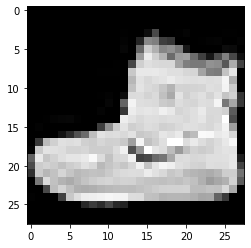

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
y_train[0]

9

In [ ]:
class_labels={ 0: "T-shirt/top", 1: "Trouser",  2 : "Pullover",  3	: "Dress", 4: "Coat",  5: "Sandal", 6: "Shirt", 7 :"Sneaker",  8: "Bag",  9 : "Ankle boot" }

class_labels[y_train[0]]

'Ankle boot'

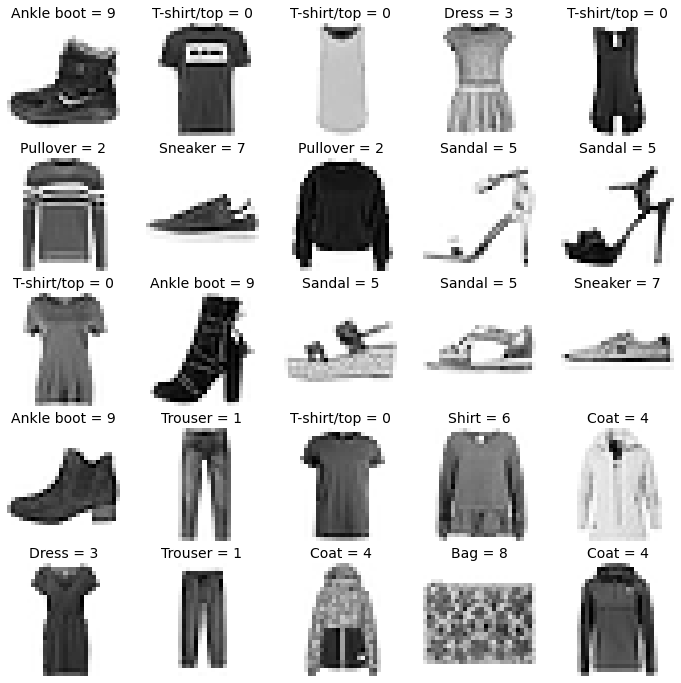

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]] + " = " + str(y_train[i]),fontsize=14)

<h1><b>Step 3) Preprocessing : </b></h1>
  Feature Scaling (standardizations) (0 to 1 range)


In [ ]:
x_train = x_train / 255

In [ ]:
x_test = x_test / 255

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.050980,0.286275,0.000000,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.141176,0.533333,0.498039,0.243137,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.000000,0.400000,0.800000,0.690196,0.525490,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.607843,0.925490,0.811765,0.698039,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.270588,0.811765,0.874510,0.854902,0.847059,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.000000,0.784314,0.909804,0.909804,0.913725,0.898039,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717647,0.882353,0.847059,0.874510,0.894118,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


<h1><b>Step 4) Build Models :</b></h1>



In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7611 - accuracy: 0.7426 - val_loss: 0.4902 - val_accuracy: 0.8237
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.8450 - val_loss: 0.4541 - val_accuracy: 0.8418
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4047 - accuracy: 0.8562 - val_loss: 0.4122 - val_accuracy: 0.8552
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3677 - accuracy: 0.8688 - val_loss: 0.4328 - val_accuracy: 0.8407
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3560 - accuracy: 0.8731 - val_loss: 0.3614 - val_accuracy: 0.8736
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3396 - accuracy: 0.8771 - val_loss: 0.3765 - val_accuracy: 0.8635
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3250 - accuracy: 0.8822 - val_loss: 0.3822 - val_accuracy:

<h1><b>Step 5) Test and Evaluate Model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3841 - accuracy: 0.8624


[0.3840513229370117, 0.8623999953269958]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.12, 0.  , 0.72],
      dtype=float32)

In [ ]:
# predicted class
np.argmax(y_pred[0].round(2)) , class_labels[ np.argmax(y_pred[0].round(2)) ]

(9, 'Ankle boot')

In [ ]:
# actual class
y_test[0], class_labels[y_test[0]]

(9, 'Ankle boot')

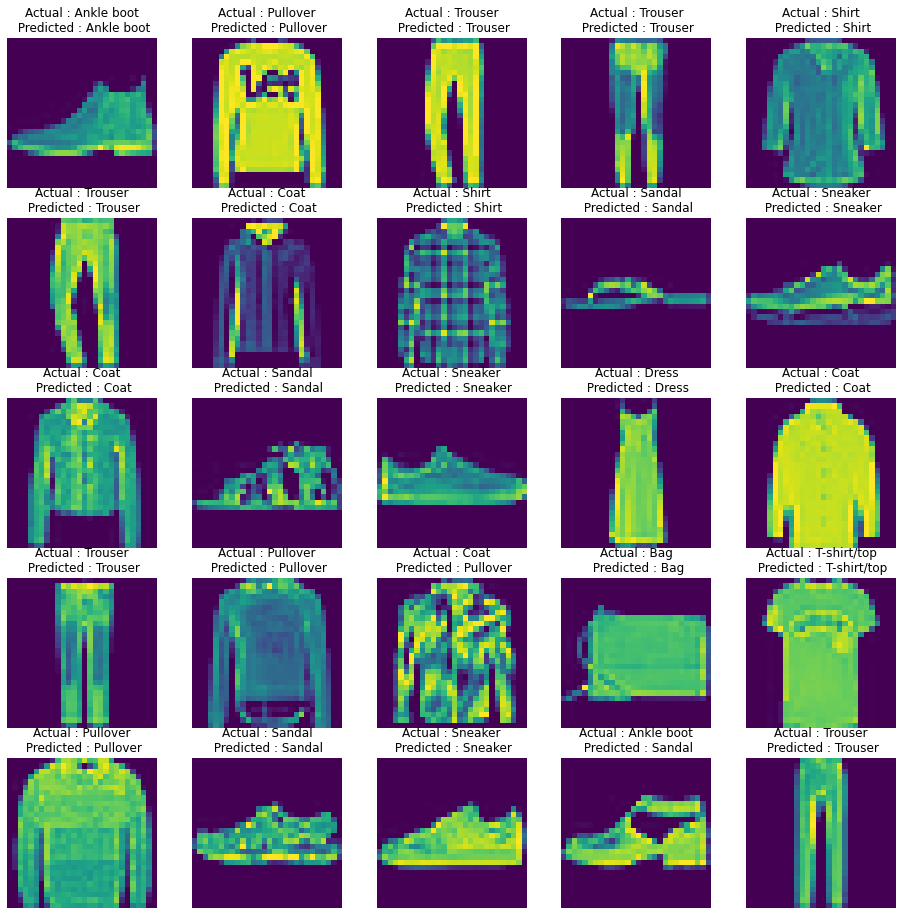

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("Actual : {}\n Predicted : {}".format(class_labels[y_test[i]],
                                                  class_labels[np.argmax(y_pred[i])]),
                                          fontsize=12)

<h1><b>Confusion Matrix</b></h1>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred] )

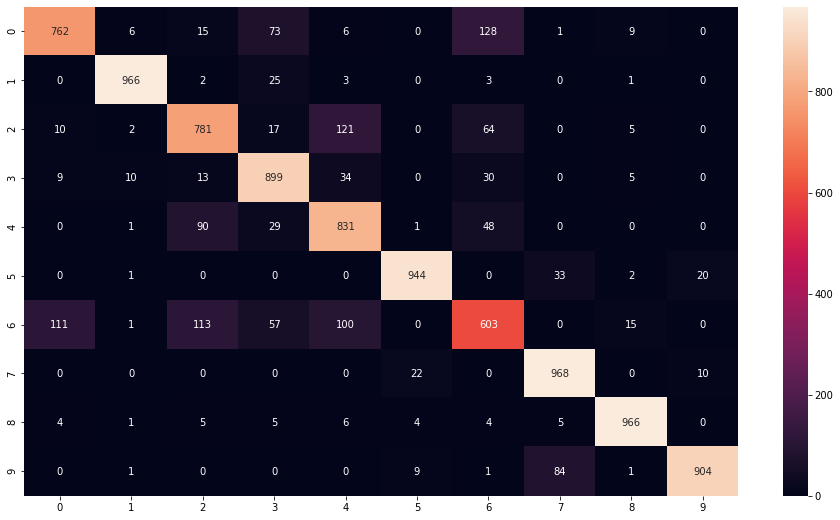

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d")

<h1><b>Classification Report</b></h1>


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,[np.argmax(i) for i in y_pred],target_names=class_labels.values())

In [ ]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.76      0.80      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.77      0.78      0.77      1000
       Dress       0.81      0.90      0.85      1000
        Coat       0.75      0.83      0.79      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.68      0.60      0.64      1000
     Sneaker       0.89      0.97      0.93      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.97      0.90      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<h1><b>Save Model </b></h1>

In [ ]:
model.save("MNIST_classifier_nn_model.h5")

In [ ]:
model_new = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [ ]:
model_new.predict(x_test)

array([[1.09872271e-05, 7.10116637e-07, 7.26814187e-06, ...,
        1.19656317e-01, 4.96861944e-03, 7.21889257e-01],
       [5.06437846e-06, 5.24531102e-13, 9.92462158e-01, ...,
        4.48757642e-18, 1.47200603e-06, 4.70468516e-16],
       [1.46120169e-06, 9.99987841e-01, 1.34503512e-06, ...,
        1.67083602e-15, 8.99592401e-10, 1.13160792e-11],
       ...,
       [2.07513408e-03, 1.01478215e-10, 2.55484629e-04, ...,
        3.66776609e-09, 9.95839238e-01, 6.43639275e-09],
       [7.13705901e-07, 9.99422193e-01, 4.13453449e-07, ...,
        7.71329596e-08, 6.21148786e-08, 4.46408741e-08],
       [3.47183277e-06, 1.65414193e-07, 4.40405056e-05, ...,
        2.28150585e-03, 6.38659403e-04, 1.43893585e-05]], dtype=float32)

In [ ]:
len(x_test),len(x_test[0]),len(x_test[0][0]) 

(10000, 28, 28)